# **Problem 1** - Basin of Attraction

Consider a differentiable function, denoted as $f(x)$, that possesses multiple roots. When initiating Newton-Raphson's Method with a given starting value for $x$, the process typically converges to one of the roots, barring exceptional cases outlined in the lecture slide. It stands to reason that starting points near each other should all end up at the same root, and for some functions this is true. However, it is not true in general.

A _basin of attraction_ for a root is defined as the collection of $x$-values that, under Newton iterations, converge to that specific root. In the context of this problem, you will generate color-coded plots to visualize the basins of attraction for the following functions according to the following procedure:

- Find the actual roots of the function by hand (this should be easy on the functions below).
- Assign each of the roots a different color.
- Pick a starting point on the $x$-axis and use it to start Newton-Raphson's method.
- Color the starting point according to the root that it converges to.
- Repeat this process for many many starting points so you get a colored picture of the $x$-axis showing where the starting points converge to.

The group of points sharing a common color designation represents the basin of attraction corresponding to the root associated with that particular color.

An example basin of attraction image for a cubic function looks something like this.
<br>
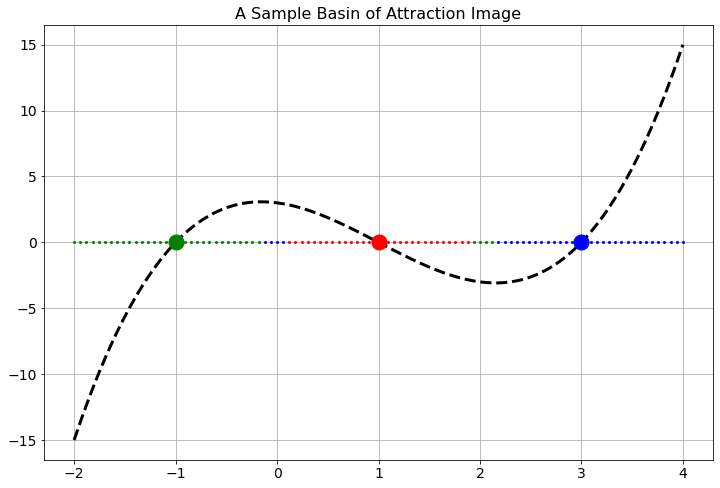

1.  Create a basin on attraction image for the function $f(x) = (x-4)(x+1)$.
2.  Create a basin on attraction image for the function $g(x) = (x-1)(x+3)$.
3.  Create a basin on attraction image for the function $h(x) = (x-4)(x-1)(x+3)$.

**Note:** You can use `matplotlib`, `plotly`, `pyplot`, `seaborn` or whatever plotting package you want.


In [1]:
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return (x - 4) * (x + 1)

def g1(x):
    return (x - 1) * (x + 3)

def h1(x):
    return (x - 4) * (x - 1) * (x + 3)

def f1_derivative(x):
    return 2 * x - 3

def g1_derivative(x):
    return 2 * x + 2

def h1_derivative(x):
    return 3 * x**2 - 6 * x - 7


roots_f1 = [4, -1]
roots_g1 = [1, -3]
roots_h1 = [4, 1, -3]

In [3]:
def newton_raphson(func, func_derivative, x0, tol=1e-6, max_iter=100):
    x = x0
    iteration = 0

    while iteration < max_iter:
        f_x = func(x)
        f_prime_x = func_derivative(x)
        if f_prime_x == 0:
            return None
        x = x - f_x / f_prime_x
        if abs(f_x) < tol:
            return x

        iteration += 1

    return None

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_function(func, roots, func_derivative):
    colors = ['blue', 'green', 'red', 'black']

    x_values = np.linspace(-5, 5, 1000)

    plt.plot(x_values, func(x_values), label=f'{func.__name__}(x)', linestyle='--', color='black')

    for i, root in enumerate(roots):
        plt.scatter(root, 0, color=colors[i % len(colors)], marker='o', s=100, label=f'Root {i+1}')

    for x_start in np.linspace(-5, 5, 1000):
        root = newton_raphson(func, func_derivative, x_start)
        if root is not None:
            index = roots.index(round(root))
            plt.scatter(x_start, 0, color=colors[index % len(colors)], marker='.', s=10)

    for root in roots:
        plt.axvline(x=root, linestyle='--', color='gray', alpha=0.5)

    plt.title(f'Basins of Attraction for {func.__name__}(x) using Newton-Raphson Method')
    plt.xlabel('x')
    plt.ylabel(f'{func.__name__}(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

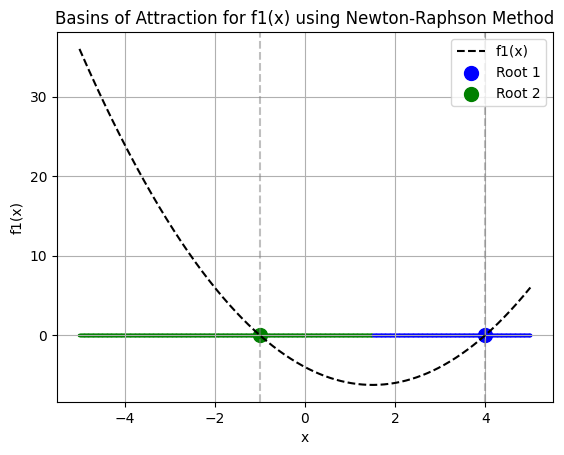

In [5]:
plot_function(f1, roots_f1, f1_derivative)

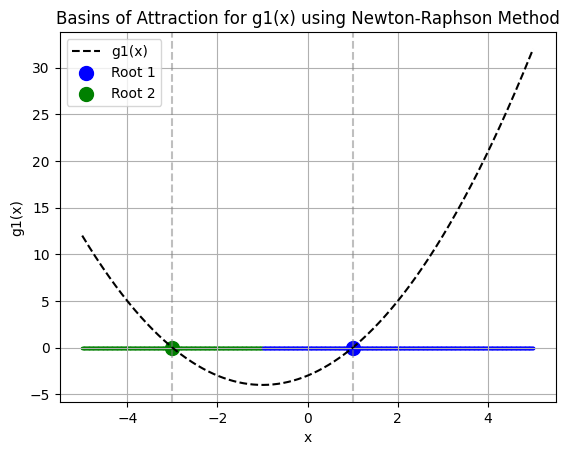

In [6]:
plot_function(g1, roots_g1, g1_derivative)

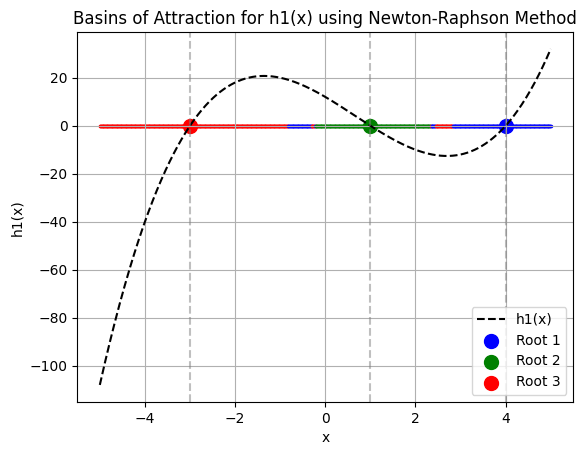

In [7]:
plot_function(h1, roots_h1, h1_derivative)

# **Problem 2** - The Goat Problem

To understand the problem statement, grab a pencil and a piece of paper at first!

- Draw a coordinate plane
- Draw a circle with radius $1$ unit centered at the point $(0,1)$. This circle will obviously be tangent to the $x$-axis.
- Draw a circle with radius $r$ centered at the point $(0,0)$. Take $0< r < 2$ so there are two intersections of the two circles.
- Label the left-hand intersection of the two circles as point $A$. (Point $A$ should be in the second quadrant of your coordinate plane.)
- Label the right-hand intersection of the two circles as point $B$. (Point $B$ should be in the first quadrant of your coordinate plane.)
- Label the point $(0,0)$ as the point $P$.

A rancher has built a circular fence of radius $1$ unit centered at the point $(0,1)$ for his goat to graze. He tethers his goat at point $P$ on the far south end of the circular fence. He wants to make the length of the goat’s chain, $r$, just long enough so that it can graze half of the area of the fenced region. How long should he make the chain?

**Hints:**

- It would be helpful to write equations for both circles. Then you can use the equations to find the coordinates of the intersection points $A$ and $B$.
- You can either solve for the intersection points algebraically or you can use a numerical root finding technique to find the intersection points.
- In any case, the intersection points will (obviously) depend on the value of $r$.
- Set up an integral to find the area grazed by the goat.
- You will likely need to use a numerical integration technique to evaluate the integral.
- You might need to perform numerical integration for this problem. You can implement your own function for this or you can opt to use the `scipy.integrate.quad()` function.

Write your code to narrow down on the best value of $r$ where the integral evaluates to half the area of the fenced region.


In [8]:
! pip install scipy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import minimize

def circle1(y):
    return np.sqrt(1 - (y - 1)**2)

def circle2(y, r):
    return np.sqrt(r**2 - y**2)

def area_difference(r):
    limit_1_lower = 0
    limit_1_upper = r**2 / 2

    limit_2_lower = r**2 / 2
    limit_2_upper = r

    integral_1, _ = quad(circle1, limit_1_lower, limit_1_upper)
    integral_2, _ = quad(circle2, limit_2_lower, limit_2_upper, args=(r,))

    fenced_area = np.pi / 2
    goat_grazed_area = (integral_1 + integral_2) * 2

    return np.abs(goat_grazed_area - fenced_area)

result = minimize(area_difference, x0=1.0, bounds=[(0, 2)])

optimal_radius = result.x[0]

print("Optimal Radius:", optimal_radius)

Optimal Radius: 1.1587284730182483


# **Problem 3** - Game of Cookies

Alice a dessert-queen who can make exceptionally yummy chocolate chip cookies. Bob is a cookie connoisseur whose hunger rivals that of the (in)famous Cookie Monster from Sesame Street. One day, Alice and Bob decide to play a game. Bob chooses an arbitrary positive integer $k$. Alice doesn't know what this number $k$ is. She chooses two real numbers $a$ and $b$ randomly from within the interval $[0,1]$ with uniform distribution. Suppose, you are acting as the referee in this game. You compute the square root of the sum $(ak+1)^2 + (bk+1)^2$ and round it to the next integer. If the result is equal to $k$, Bob gets to eat $k$ of Alice's cookies for free; otherwise he doesn't get to eat any cookies.

For example, if $k = 6$, $a = 0.2$, and $b=0.85$, then the value that you get would be $\sqrt{(ak+1)^2 + (bk+1)^2} = \sqrt{42.05} = 6.484$. After you round it to the nearest integer it becomes $6$ which is equal to $k$. So, Bob will be allowed to eat $6$ cookies.

## Input

You'll be given the value of $n$, the number of turns of the game.

## Output

Print the expected value of the total number of cookies Bob will eat, rounded to five decimal places, if he plays $n$ turns with $k=1$, $k=2$, $k=3$, $\dots$, $k=n$ (for the $1^{st}$, $2^{nd}$, $3^{rd}$, $\dots$, and $n^{th}$ turns respectively).


### Sample Cases

#### Input

$10$

#### Output

$10.20914$

#### Input

$73$

#### Output

$105.27674$

#### Input

$100000$

#### Output

$157055.80999$

#### Input

$69420$

#### Output

$109021.5883$

**Hint:** You might need to perform numerical integration for this problem. You can implement your own function for this or you can opt to use the `scipy.integrate.quad()` function.


In [10]:
import numpy as np
from scipy.integrate import quad

def curve(k, sign):
    if k == 1 and sign == -1:
        return 0
    
    upper_limit = np.sqrt((1 + sign / (2 * k))**2 - 1 / k**2) - 1 / k
    equation = lambda x: np.sqrt((1 + sign / (2 * k))**2 - (x + 1 / k)**2) - 1 / k
    result, _ = quad(equation, 0, upper_limit)
    return result

def expected_val(k):
    total_cookies = 0
    for i in range(1, k + 1):
        total_cookies += i * (curve(i, 1) - curve(i, -1))

    return round(total_cookies, 5)

sampleData = [10, 73, 100000, 69420]

for data in sampleData:
    print(f'For Input {data}, Output: {expected_val(data)}')

For Input 10, Output: 10.20914
For Input 73, Output: 105.27674
For Input 100000, Output: 157055.80999
For Input 69420, Output: 109021.5883


# **Problem 4** - Geronimo!

An object falling vertically through the air is subject to friction due to air resistance as well as gravity. The function describing the position of such a function is
$$s(t) = s_0 - \frac{mg}{k}t + \frac{m^2g}{k^2}\left(1-e^{-kt/m}\right)$$
where $m$ is the mass measured in kg, $g$ is gravity measured in meters per second per second, $s_0$ is the initial position measured in meters, and $k$ is the coefficient of air resistance.

If $m=1kg$, $g=9.8ms^{-2}$, $k=0.1$, and $s_0=100m$, how long will it take for the object to hit the ground?


In [11]:
import numpy as np
from scipy.optimize import fsolve

m = 1
g = 9.8
k = 0.1
s0 = 100

def position_function(t):
    return s0 - (m * g * t / k) + (m**2 * g / k**2) * (1 - np.exp(-k * t / m))

time_to_ground, = fsolve(position_function, x0=1)

print(f"The Object Hit the Ground at t = {time_to_ground} seconds.")

The Object Hit the Ground at t = 4.884865260688327 seconds.


# **Problem 5** - Int$\times$Plot

Numerically integrate each of the functions over the interval $[-1,2]$ with an appropriate technique and verify mathematically that your numerical integral is correct to 10 decimal places. Then provide a plot of the function along with its area beneath the curve.

1.  $f(x) = \frac{x}{1+x^4}$
2.  $g(x) = (x-1)^3(x-2)^2$
3.  $h(x) = \sin(x^2)$

**Note:** Implement your own numerical integration function for this problem.


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import numpy as np

def exact_integral(function, lower, upper):
    res, error = integrate.quad(function, lower, upper)
    return res

def f(x):
    return x/(1+x**4)

def g(x):
  return ((x-1)**3)*((x-2)**2)

def h(x):
  return np.sin(x**2)



def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    result = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        result += f(a + i * h)
    result *= h
    return result

In [13]:
a = -1
b = 2
n = 10000000

# Calculation For f(x)
exactResult = exact_integral(f,a,b)
result = trapezoidal_rule(f,a,b,n)
print("Numerical Exact Result:", exactResult)
print("Numerical Result using Trapezoidal Rule :", result)

Numerical Exact Result: 0.2702097501352914
Numerical Result using Trapezoidal Rule : 0.2702097501352565


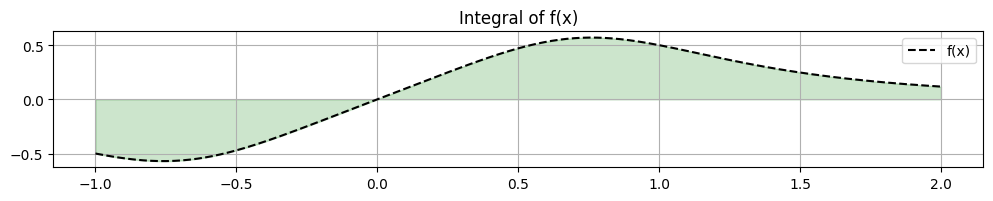

In [14]:
# Plotting for f(x)
x_values_f = np.linspace(a, b, 1000)
y_values_f = f(x_values_f)

exact_result_f = exact_integral(f, a, b)
numerical_result_f = trapezoidal_rule(f, a, b, n)

plt.figure(figsize=(12, 6))

plt.subplot(311)
plt.plot(x_values_f, y_values_f, label='f(x)', color='black', linestyle='--')
plt.fill_between(x_values_f, y_values_f, alpha=0.2, color='green')
plt.title(f'Integral of f(x)')
plt.grid(True)
plt.legend()

In [15]:
# Calculation For g(x)
exactResult = exact_integral(g,a,b)
result = trapezoidal_rule(g,a,b,n)
print("Numerical Exact Result:", exactResult)
print("Numerical Result using Trapezoidal Rule :", result)

Numerical Exact Result: -27.450000000000003
Numerical Result using Trapezoidal Rule : -27.450000000004707


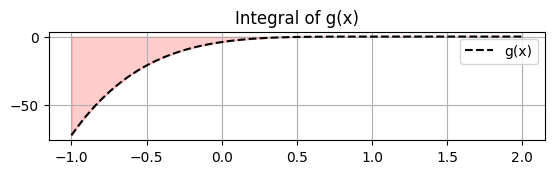

In [16]:
# Plotting For g(x)
x_values_g = np.linspace(a, b, 1000)
y_values_g = g(x_values_g)

exact_result_g = exact_integral(g, a, b)
numerical_result_g = trapezoidal_rule(g, a, b, n)

plt.subplot(312)
plt.plot(x_values_g, y_values_g, label='g(x)', color='black', linestyle='--')
plt.fill_between(x_values_g, y_values_g, alpha=0.2, color='red')
plt.title(f'Integral of g(x)')
plt.grid(True)
plt.legend()

In [17]:
# Calculation For h(x)
exactResult = exact_integral(h,a,b)
result = trapezoidal_rule(h,a,b,n)
print("Numerical Exact Result:", exactResult)
print("Numerical Result using Trapezoidal Rule :", result)

Numerical Exact Result: 1.115044791067137
Numerical Result using Trapezoidal Rule : 1.115044791066997


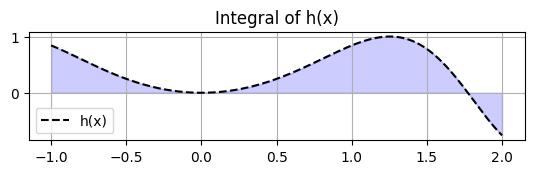

In [18]:
# Plotting for h(x)
x_values_h = np.linspace(a, b, 1000)
y_values_h = h(x_values_h)

exact_result_h = exact_integral(h, a, b)
numerical_result_h = trapezoidal_rule(h, a, b, n)

plt.subplot(313)
plt.plot(x_values_h, y_values_h, label='h(x)', color='black', linestyle='--')
plt.fill_between(x_values_h, y_values_h, alpha=0.2, color='blue')
plt.title(f'Integral of h(x)')
plt.legend()
plt.grid(True)
plt.show()